In [2]:
## Completed by Naman Gupta
## UID - 120995811

In [3]:
# load required modules
import shap
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats

#statsmodels:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2

#scikit-learn:
import sklearn.linear_model as sklm
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

# for KNN with scikit-learn:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
## Pull data from world csv

In [6]:
world_data_full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Large Data Sets for Python/worlddata.csv')
world_data_full

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
...,...,...,...,...,...,...
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,3.600000e+01
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,9.000000e+01
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,2.420000e+02
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.300000e+00


In [7]:
world_data_full['Year'].unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

In [8]:
Indicator_Values = world_data_full.IndicatorName.unique()
Indicator_Values

array(['Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)', ...,
       'Fish species, threatened', 'Mammal species, threatened',
       'Plant species (higher), threatened'], dtype=object)

In [9]:
len(Indicator_Values)

1344

In [10]:
for i in Indicator_Values:
  print(i)

Adolescent fertility rate (births per 1,000 women ages 15-19)
Age dependency ratio (% of working-age population)
Age dependency ratio, old (% of working-age population)
Age dependency ratio, young (% of working-age population)
Arms exports (SIPRI trend indicator values)
Arms imports (SIPRI trend indicator values)
Birth rate, crude (per 1,000 people)
CO2 emissions (kt)
CO2 emissions (metric tons per capita)
CO2 emissions from gaseous fuel consumption (% of total)
CO2 emissions from liquid fuel consumption (% of total)
CO2 emissions from liquid fuel consumption (kt)
CO2 emissions from solid fuel consumption (% of total)
Death rate, crude (per 1,000 people)
Fertility rate, total (births per woman)
Fixed telephone subscriptions
Fixed telephone subscriptions (per 100 people)
Hospital beds (per 1,000 people)
International migrant stock (% of population)
International migrant stock, total
Life expectancy at birth, female (years)
Life expectancy at birth, male (years)
Life expectancy at birth,

In [11]:
# Create indicator names as columns for each country and year in 1 row

world_data_pivot = world_data_full.pivot_table(index=['CountryCode', 'Year'], columns='IndicatorName', values='Value')
#world_data_pivot

# Reset the index to make 'CountryCode' and 'Year' regular columns
world_data_pivot = world_data_pivot.reset_index()

#wd_subset_USA = world_data_pivot[(world_data_pivot['CountryCode'] == 'USA')]
#wd_subset_USA

In [12]:
len(world_data_pivot)

13831

In [13]:
## Random Checks to see if data was correctly transposed from rows to columns

In [14]:
world_data_pivot[world_data_pivot['CountryCode']=='USA']

IndicatorName,CountryCode,Year,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",ARI treatment (% of children under 5 taken to a health provider),Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Access to non-solid fuel (% of population),"Access to non-solid fuel, rural (% of rural population)",...,Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women's share of population ages 15+ living with HIV (%),"Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
12991,USA,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12992,USA,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12993,USA,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12994,USA,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12995,USA,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12996,USA,1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12997,USA,1966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12998,USA,1967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12999,USA,1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13000,USA,1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
world_data_full[(world_data_full['CountryCode']=='USA') &
 (world_data_full['IndicatorName']=='2005 PPP conversion factor, GDP (LCU per international $)')]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4115204,United States,USA,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,2005,1.0


In [16]:
## All columns for world_data_pivot
for i in world_data_pivot.columns:
  print(i)

CountryCode
Year
2005 PPP conversion factor, GDP (LCU per international $)
2005 PPP conversion factor, private consumption (LCU per international $)
ARI treatment (% of children under 5 taken to a health provider)
Access to electricity (% of population)
Access to electricity, rural (% of rural population)
Access to electricity, urban (% of urban population)
Access to non-solid fuel (% of population)
Access to non-solid fuel, rural (% of rural population)
Access to non-solid fuel, urban (% of urban population)
Adequacy of social insurance programs (% of total welfare of beneficiary households)
Adequacy of social protection and labor programs (% of total welfare of beneficiary households)
Adequacy of social safety net programs (% of total welfare of beneficiary households)
Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households)
Adjusted net enrolment rate, primary, both sexes (%)
Adjusted net enrolment rate, primary, female (%)
Adjusted net enrolment rat

In [17]:
# Calculate the percentage of missing values for each column
missing_percentage = (world_data_pivot.isnull().sum() / len(world_data_pivot)) * 100

# Print the results
print("Percentage of Missing Values in Each Column:")
missing_percentage.sort_values(ascending=False)

Percentage of Missing Values in Each Column:


,0
IndicatorName,
"Survey mean consumption or income per capita, bottom 40% of population (2005 PPP $ per day)",99.942159
"Survey mean consumption or income per capita, total population (2005 PPP $ per day)",99.942159
Benefits incidence in poorest quintile (%) - All Labor Market,99.515581
Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households),99.515581
"Present value of external debt (% of exports of goods, services and primary income)",99.501121
...,...
Urban population (% of total),3.007736
Population growth (annual %),2.812523
"Population, total",2.508857


In [18]:
# Drop columns where missing values exceed 30%
world_data_pivot_after_na_removal = world_data_pivot.dropna(thresh=len(world_data_pivot) * 0.7, axis=1)

In [19]:
print('Columns with less than %threshold missing values',len(world_data_pivot_after_na_removal.columns))
print('Total Columns originally',len(world_data_pivot.columns))

Columns with less than %threshold missing values 77
Total Columns originally 1346


In [20]:
for i in world_data_pivot_after_na_removal.columns:
  print(i)

CountryCode
Year
Adolescent fertility rate (births per 1,000 women ages 15-19)
Age dependency ratio (% of working-age population)
Age dependency ratio, old (% of working-age population)
Age dependency ratio, young (% of working-age population)
Agricultural land (% of land area)
Agricultural land (sq. km)
Arable land (% of land area)
Arable land (hectares per person)
Arable land (hectares)
Birth rate, crude (per 1,000 people)
CO2 emissions (kt)
CO2 emissions (metric tons per capita)
CO2 emissions from gaseous fuel consumption (% of total)
CO2 emissions from gaseous fuel consumption (kt)
CO2 emissions from liquid fuel consumption (% of total)
CO2 emissions from liquid fuel consumption (kt)
CO2 emissions from solid fuel consumption (% of total)
CO2 emissions from solid fuel consumption (kt)
Cereal production (metric tons)
Cereal yield (kg per hectare)
Crop production index (2004-2006 = 100)
DEC alternative conversion factor (LCU per US$)
Death rate, crude (per 1,000 people)
Fertility rate

In [21]:
# Calculate the percentage of missing values for each column
missing_percentage = (world_data_pivot_after_na_removal.isnull().sum() / len(world_data_pivot_after_na_removal)) * 100

# Print the results
print("Percentage of Missing Values in Each Column:")
missing_percentage.sort_values(ascending=False)

Percentage of Missing Values in Each Column:


,0
IndicatorName,
DEC alternative conversion factor (LCU per US$),29.564023
Population in the largest city (% of urban population),29.274817
"Inflation, GDP deflator (annual %)",28.696407
GNI (current US$),28.486733
Merchandise imports from developing economies in South Asia (% of total merchandise imports),28.320440
...,...
Urban population (% of total),3.007736
Population growth (annual %),2.812523
"Population, total",2.508857


In [22]:
## Let's look at how CO2 emissions (metric tons per capita) can be explained using the above variables.

In [23]:
#These are utility tools of the DMBA book. Install the "dmba" package first (just one time)

!pip install dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 79.8 MB/s eta 0:00:00
Colab environment detected.


In [24]:
## Consider Removing a

In [25]:
world_data_pivot_after_na_removal_train = world_data_pivot_after_na_removal.dropna()

In [26]:
world_data_predictors = world_data_pivot_after_na_removal_train.drop(['CO2 emissions (metric tons per capita)','CountryCode','Year'], axis=1)
#print(world_data_predictors.dtypes)

x_aligned = pd.get_dummies(world_data_predictors, drop_first=True) # Converting object type variables (Fuel_Type in this case) into dummy
#X
y_aligned = world_data_pivot_after_na_removal_train['CO2 emissions (metric tons per capita)']
#y

# Combine train_x and train_y into one DataFrame to ensure alignment after dropping NaNs
#combined_df = pd.concat([x, y], axis=1)

# Drop rows where any value is NaN (either in predictors or target)
#combined_df.dropna(inplace=True)

# Split back into predictors (x_aligned) and target (y_aligned)
#x_aligned = combined_df.drop('CO2 emissions (metric tons per capita)', axis=1)
#y_aligned = combined_df['CO2 emissions (metric tons per capita)']

train_x, valid_x, train_y, valid_y = train_test_split(x_aligned, y_aligned, test_size=0.25, random_state=1)

In [27]:
"""
def train_model(variables):
    model = sklm.LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_x[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

# ?exhaustive_search
allVariables = train_x.columns
results = exhaustive_search(allVariables, train_model, score_model)
results

"""

'\ndef train_model(variables):\n    model = sklm.LinearRegression()\n    model.fit(train_x[variables], train_y)\n    return model\n\ndef score_model(model, variables):\n    pred_y = model.predict(train_x[variables])\n    # we negate as score is optimized to be as low as possible\n    return -adjusted_r2_score(train_y, pred_y, model)\n\n# ?exhaustive_search\nallVariables = train_x.columns\nresults = exhaustive_search(allVariables, train_model, score_model)\nresults\n\n'

In [28]:
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = sklm.LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_x[variables]), model)

best_model, best_variables = forward_selection(train_x.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Adolescent fertility rate (births per 1,000 women ages 15-19), Age dependency ratio (% of working-age population), Age dependency ratio, old (% of working-age population), Age dependency ratio, young (% of working-age population), Agricultural land (% of land area), Agricultural land (sq. km), Arable land (% of land area), Arable land (hectares per person), Arable land (hectares), Birth rate, crude (per 1,000 people), CO2 emissions (kt), CO2 emissions from gaseous fuel consumption (% of total), CO2 emissions from gaseous fuel consumption (kt), CO2 emissions from liquid fuel consumption (% of total), CO2 emissions from liquid fuel consumption (kt), CO2 emissions from solid fuel consumption (% of total), CO2 emissions from solid fuel consumption (kt), Cereal production (metric tons), Cereal yield (kg per hectare), Crop production index (2004-2006 = 100), DEC alternative conversion factor (LCU per US$), Death rate, crude (per 1,000 people), Fertility rate, total (births per wom

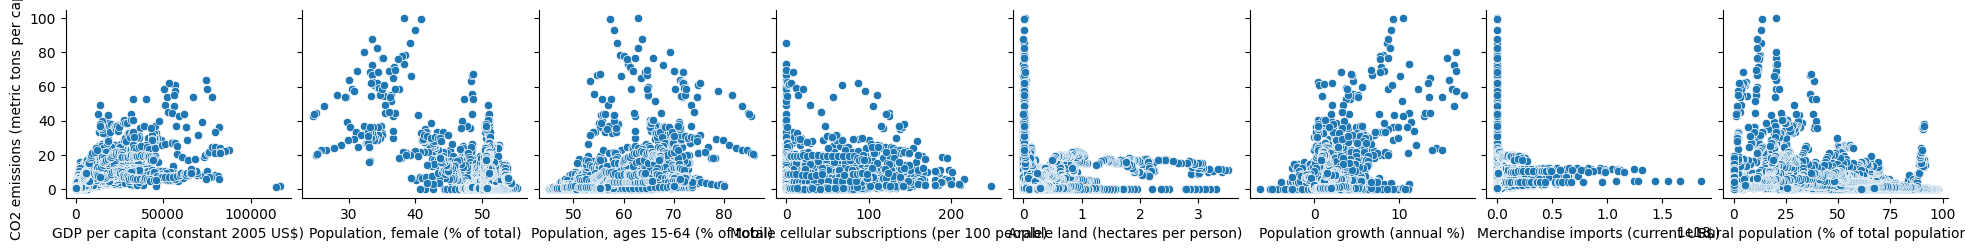

In [29]:
import seaborn as sns
sns.pairplot(data=world_data_pivot_after_na_removal, y_vars=['CO2 emissions (metric tons per capita)'],
             x_vars=['GDP per capita (constant 2005 US$)',
                     'Population, female (% of total)',
                     'Population, ages 15-64 (% of total)',
                     'Mobile cellular subscriptions (per 100 people)',
                     'Arable land (hectares per person)',
                     'Population growth (annual %)',
                     'Merchandise imports (current US$)',
                     'Rural population (% of total population)'])

In [30]:
## Run intial Regression for explanation on variables identified using forward selection

In [31]:
y = world_data_pivot_after_na_removal_train['CO2 emissions (metric tons per capita)']
X = world_data_pivot_after_na_removal_train[['GDP per capita (constant 2005 US$)',
                     'Population, female (% of total)',
                     'Population, ages 15-64 (% of total)',
                     'Mobile cellular subscriptions (per 100 people)',
                     'Arable land (hectares per person)',
                     'Population growth (annual %)',
                     'Rural population (% of total population)']]
X=sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     CO2 emissions (metric tons per capita)   R-squared:                       0.761
Model:                                                OLS   Adj. R-squared:                  0.761
Method:                                     Least Squares   F-statistic:                     1817.
Date:                                    Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                                            05:35:28   Log-Likelihood:                -9340.9
No. Observations:                                    3996   AIC:                         1.870e+04
Df Residuals:                                        3988   BIC:                         1.875e+04
Df Model:                                               7                                         
Covariance Type:                                nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             20.3383      1.871     10.872      0.000      16.671      24.006
GDP per capita (constant 2005 US$)                 0.0002   4.26e-06     40.164      0.000       0.000       0.000
Population, female (% of total)                   -0.6761      0.029    -23.110      0.000      -0.733      -0.619
Population, ages 15-64 (% of total)                0.2699      0.010     26.187      0.000       0.250       0.290
Mobile cellular subscriptions (per 100 people)    -0.0043      0.001     -3.371      0.001      -0.007      -0.002
Arable land (hectares per person)                  3.1268      0.114     27.367      0.000       2.903       3.351
Population growth (annual %)                       0.4161      0.048      8.608      0.000       0.321       0.511
Rural population (% of total population)          -0.0329      0.003    -12.966      0.000      -0.038      -0.028
==============================================================================
Omnibus:                     1969.406   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43257.211
Skew:                           1.848   Prob(JB):                         0.00
Kurtosis:                      18.689   Cond. No.                     6.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
## Run intial Regression for explanation on variables with p values less than 0.05

In [33]:
y = world_data_pivot_after_na_removal_train['CO2 emissions (metric tons per capita)']
X = world_data_pivot_after_na_removal_train[['GDP per capita (constant 2005 US$)',
                     'Population, female (% of total)',
                     'Population, ages 15-64 (% of total)',
                     'Mobile cellular subscriptions (per 100 people)',
                     'Arable land (hectares per person)',
                     'Population growth (annual %)',
                     'Rural population (% of total population)']]
X=sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     CO2 emissions (metric tons per capita)   R-squared:                       0.761
Model:                                                OLS   Adj. R-squared:                  0.761
Method:                                     Least Squares   F-statistic:                     1817.
Date:                                    Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                                            05:35:28   Log-Likelihood:                -9340.9
No. Observations:                                    3996   AIC:                         1.870e+04
Df Residuals:                                        3988   BIC:                         1.875e+04
Df Model:                                               7                                         
Covariance Type:                                nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             20.3383      1.871     10.872      0.000      16.671      24.006
GDP per capita (constant 2005 US$)                 0.0002   4.26e-06     40.164      0.000       0.000       0.000
Population, female (% of total)                   -0.6761      0.029    -23.110      0.000      -0.733      -0.619
Population, ages 15-64 (% of total)                0.2699      0.010     26.187      0.000       0.250       0.290
Mobile cellular subscriptions (per 100 people)    -0.0043      0.001     -3.371      0.001      -0.007      -0.002
Arable land (hectares per person)                  3.1268      0.114     27.367      0.000       2.903       3.351
Population growth (annual %)                       0.4161      0.048      8.608      0.000       0.321       0.511
Rural population (% of total population)          -0.0329      0.003    -12.966      0.000      -0.038      -0.028
==============================================================================
Omnibus:                     1969.406   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43257.211
Skew:                           1.848   Prob(JB):                         0.00
Kurtosis:                      18.689   Cond. No.                     6.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
## Heteroskedascity checks
residuals=results1.resid #provided by statsmodels
# residuals=advertising.Sales-advertising.predicted_sales #manual calculation

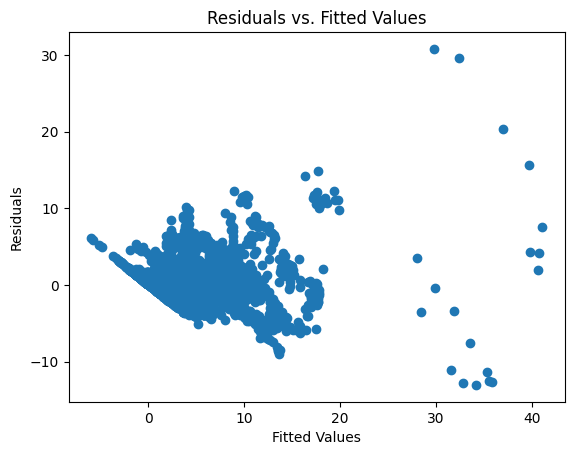

Breusch-Pagan test p-value: 2.844238555380528e-195


In [35]:
# Check for Heteroscedasticity (unequal variance of residuals)
# Plotting Residuals vs Fitted Values
plt.scatter(results1.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

# Breusch-Pagan test for Heteroscedasticity
_, p_value, _, _ = sms.het_breuschpagan(residuals, model1.exog)
print(f"Breusch-Pagan test p-value: {p_value}")

In [36]:
## P value much lower than 0.05 showing that there is indeed some heteroskedasticity

In [37]:
# Fit the OLS model with robust standard errors
model_robust = sm.OLS(y, X)
results_robust = model_robust.fit(cov_type='HC3')
# HC3 (heteroskedasticity-consistent covariance matrix estimator type 3)
## is a common robust covariance estimator

# Print the summary of the model with robust standard errors
results_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     CO2 emissions (metric tons per capita)   R-squared:                       0.761
Model:                                                OLS   Adj. R-squared:                  0.761
Method:                                     Least Squares   F-statistic:                     948.8
Date:                                    Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                                            05:35:29   Log-Likelihood:                -9340.9
No. Observations:                                    3996   AIC:                         1.870e+04
Df Residuals:                                        3988   BIC:                         1.875e+04
Df Model:                                               7                                         
Covariance Type:                                      HC3                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             20.3383      3.726      5.458      0.000      13.035      27.642
GDP per capita (constant 2005 US$)                 0.0002   7.31e-06     23.410      0.000       0.000       0.000
Population, female (% of total)                   -0.6761      0.065    -10.361      0.000      -0.804      -0.548
Population, ages 15-64 (% of total)                0.2699      0.021     12.576      0.000       0.228       0.312
Mobile cellular subscriptions (per 100 people)    -0.0043      0.002     -2.633      0.008      -0.008      -0.001
Arable land (hectares per person)                  3.1268      0.133     23.523      0.000       2.866       3.387
Population growth (annual %)                       0.4161      0.139      2.987      0.003       0.143       0.689
Rural population (% of total population)          -0.0329      0.002    -13.979      0.000      -0.038      -0.028
==============================================================================
Omnibus:                     1969.406   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43257.211
Skew:                           1.848   Prob(JB):                         0.00
Kurtosis:                      18.689   Cond. No.                     6.90e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 6.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
##Looking at multicollinearity in model

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
X = world_data_pivot_after_na_removal_train[['GDP per capita (constant 2005 US$)',
                     'Population, female (% of total)',
                     'Population, ages 15-64 (% of total)',
                     'Mobile cellular subscriptions (per 100 people)',
                     'Arable land (hectares per person)',
                     'Population growth (annual %)',
                     'Rural population (% of total population)']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,GDP per capita (constant 2005 US$),2.466937
1,"Population, female (% of total)",159.321241
2,"Population, ages 15-64 (% of total)",129.473767
3,Mobile cellular subscriptions (per 100 people),1.812442
4,Arable land (hectares per person),1.859121
5,Population growth (annual %),2.854394
6,Rural population (% of total population),11.539572


In [41]:
#VIF after removing Population, ages 15-64 (% of total)

In [42]:
X = world_data_pivot_after_na_removal_train[['GDP per capita (constant 2005 US$)',
                     'Population, female (% of total)',
                     'Mobile cellular subscriptions (per 100 people)',
                     'Arable land (hectares per person)',
                     'Population growth (annual %)',
                     'Rural population (% of total population)']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,GDP per capita (constant 2005 US$),2.272305
1,"Population, female (% of total)",13.764393
2,Mobile cellular subscriptions (per 100 people),1.634254
3,Arable land (hectares per person),1.852422
4,Population growth (annual %),2.849123
5,Rural population (% of total population),10.030827


In [43]:
#VIF after removing Rural population (% of total population)

In [44]:
X = world_data_pivot_after_na_removal_train[['GDP per capita (constant 2005 US$)',
                     'Population, female (% of total)',
                     'Mobile cellular subscriptions (per 100 people)',
                     'Arable land (hectares per person)',
                     'Population growth (annual %)']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,GDP per capita (constant 2005 US$),1.711142
1,"Population, female (% of total)",4.417546
2,Mobile cellular subscriptions (per 100 people),1.573689
3,Arable land (hectares per person),1.830078
4,Population growth (annual %),2.540813


In [45]:
# Regression model after removing multicolinearity

In [101]:
y = world_data_pivot_after_na_removal_train['CO2 emissions (metric tons per capita)']
X = world_data_pivot_after_na_removal_train[['GDP per capita (constant 2005 US$)',
                     'Population, female (% of total)',
                     'Mobile cellular subscriptions (per 100 people)',
                     'Population growth (annual %)',
                     'Arable land (hectares per person)']]
X=sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     CO2 emissions (metric tons per capita)   R-squared:                       0.686
Model:                                                OLS   Adj. R-squared:                  0.686
Method:                                     Least Squares   F-statistic:                     1747.
Date:                                    Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                                            06:29:51   Log-Likelihood:                -9886.5
No. Observations:                                    3996   AIC:                         1.978e+04
Df Residuals:                                        3990   BIC:                         1.982e+04
Df Model:                                               5                                         
Covariance Type:                                nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             58.5783      1.558     37.607      0.000      55.524      61.632
GDP per capita (constant 2005 US$)                 0.0002   4.25e-06     56.660      0.000       0.000       0.000
Population, female (% of total)                   -1.1350      0.030    -38.023      0.000      -1.194      -1.077
Mobile cellular subscriptions (per 100 people)     0.0118      0.001      8.585      0.000       0.009       0.014
Population growth (annual %)                      -0.6205      0.043    -14.412      0.000      -0.705      -0.536
Arable land (hectares per person)                  3.5860      0.130     27.632      0.000       3.332       3.840
==============================================================================
Omnibus:                     2166.689   Durbin-Watson:                   0.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56099.167
Skew:                           2.060   Prob(JB):                         0.00
Kurtosis:                      20.887   Cond. No.                     5.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
## Looking at normality of residuals

In [103]:
residuals=results1.resid #provided by statsmodels
# residuals=advertising.Sales-advertising.predicted_sales #manual calculation

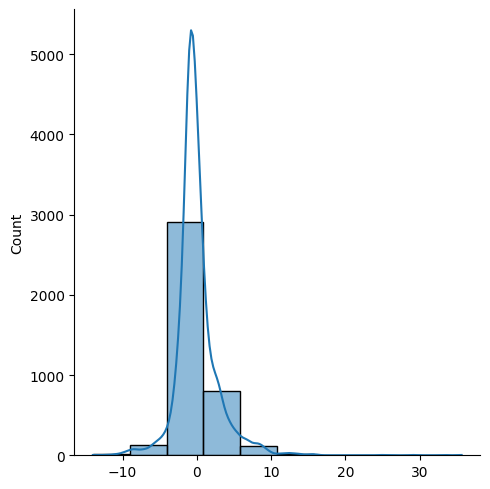

In [104]:
sns.displot(residuals, bins=10, kde=True, kind="hist")

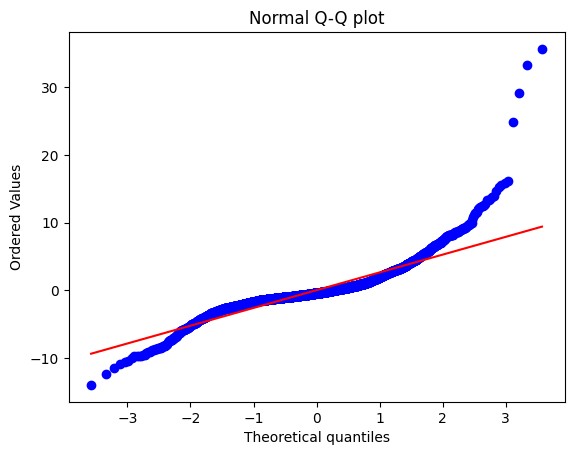

Shapiro-Wilk test p-value: 1.3824212376987059e-53


In [105]:
# Check for Normality of Residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# Shapiro-Wilk test for normality
_, p_value_shapiro = stats.shapiro(residuals)
print(f"Shapiro-Wilk test p-value: {p_value_shapiro}")

In [106]:
## Shapiro p value less than 0.05 hence we can reject null hypoothesis and conclude that residuals are non normally distirbuted

In [107]:
## Use Box Cox Transformation to try and acheive normality

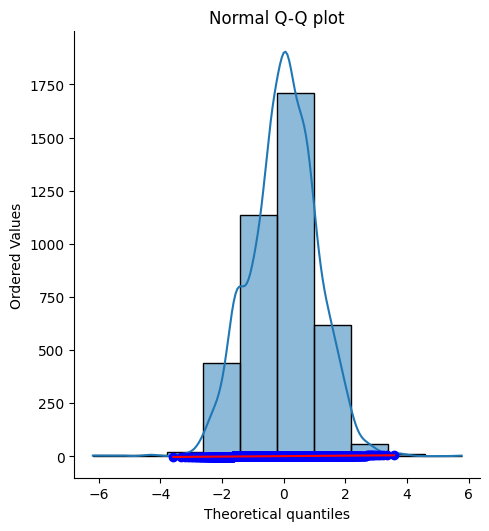

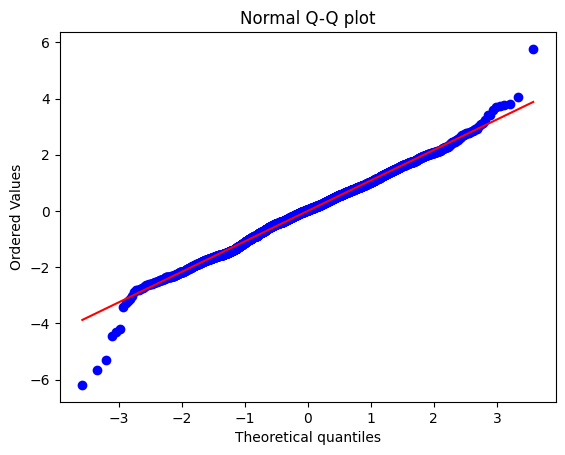

Shapiro-Wilk test p-value (Box-Cox transformed): 1.0052706119758647e-11


In [108]:
from scipy.stats import boxcox

y = world_data_pivot_after_na_removal_train['CO2 emissions (metric tons per capita)']
X = world_data_pivot_after_na_removal_train[['GDP per capita (constant 2005 US$)',
                     'Population, female (% of total)',
                     'Mobile cellular subscriptions (per 100 people)',
                     'Population growth (annual %)',
                     'Arable land (hectares per person)']]
X = sm.add_constant(X)

# Apply Box-Cox transformation to the response variable
y_transformed, lambda_val = boxcox(y)

# Fit the OLS model with the transformed response variable
model_boxcox = sm.OLS(y_transformed, X)
results_boxcox = model_boxcox.fit()

# Get the residuals of the transformed model
residuals_boxcox = results_boxcox.resid

# Visualize the distribution of the residuals
sns.displot(residuals_boxcox, bins=10, kde=True, kind="hist")
stats.probplot(residuals_boxcox, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

stats.probplot(residuals_boxcox, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

# Perform Shapiro-Wilk test for normality
_, p_value_shapiro_boxcox = stats.shapiro(residuals_boxcox)
print(f"Shapiro-Wilk test p-value (Box-Cox transformed): {p_value_shapiro_boxcox}")

In [109]:
## Outlier Check

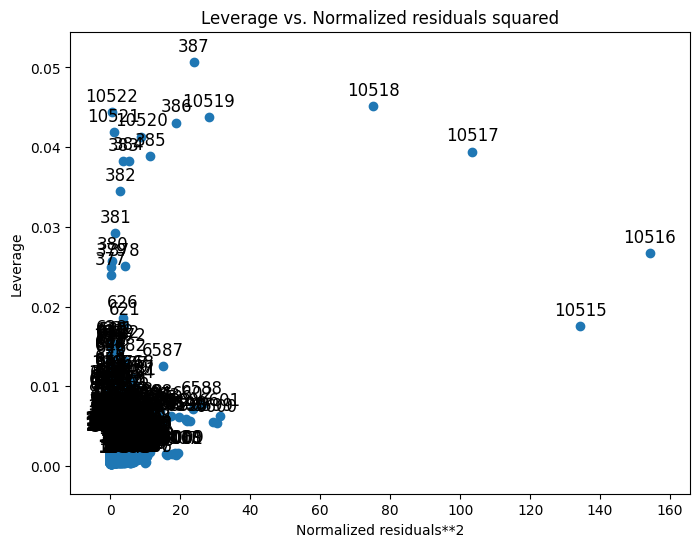

In [110]:
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results1, ax = ax)

In [111]:
world_data_pivot_after_na_removal_train.loc[10518]

,10518
IndicatorName,
CountryCode,QAT
Year,2007
"Adolescent fertility rate (births per 1,000 women ages 15-19)",15.21
Age dependency ratio (% of working-age population),22.488449
"Age dependency ratio, old (% of working-age population)",1.434385
...,...
"Survival to age 65, female (% of cohort)",87.86254
"Survival to age 65, male (% of cohort)",83.57549
Urban population,1155647.0


In [112]:
# List of index values to drop
indices_to_drop = [10518, 10517, 10516,10515]

# Drop the rows with the specified index values
world_data_pivot_after_na_removal_outlier_train = world_data_pivot_after_na_removal_train.drop(indices_to_drop)

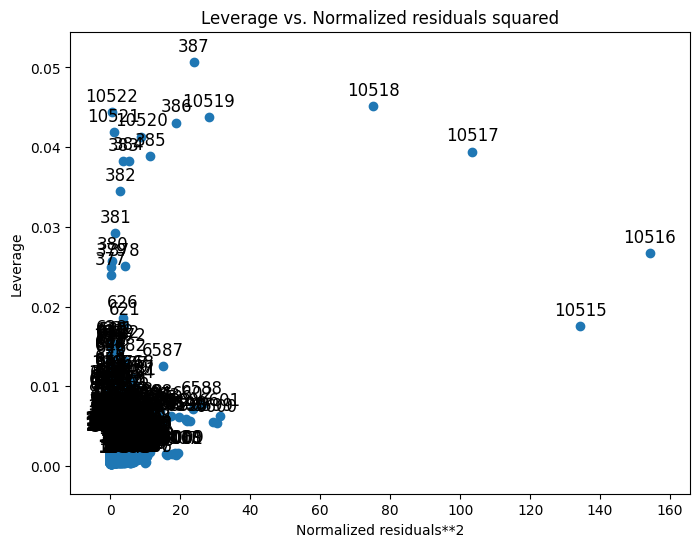

In [114]:
y = world_data_pivot_after_na_removal_train['CO2 emissions (metric tons per capita)']
X = world_data_pivot_after_na_removal_train[['GDP per capita (constant 2005 US$)',
                     'Population, female (% of total)',
                     'Mobile cellular subscriptions (per 100 people)',
                     'Population growth (annual %)',
                     'Arable land (hectares per person)']]

X=sm.add_constant(X)
model1_new = sm.OLS(y ,X)
results1_new = model1_new.fit()


fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results1_new, ax = ax)

In [115]:
## Fixed Effects

In [60]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.0 MB/s eta 0:00:00


In [116]:
from linearmodels import PanelOLS
import statsmodels.api as sm

# Assuming x_aligned and y_aligned are your dataframes
# Create a multi-index for PanelOLS

world_data_pivot_after_na_removal_train_fixed_effect = world_data_pivot_after_na_removal_outlier_train.set_index(['CountryCode', 'Year'])
world_data_pivot_after_na_removal_train_fixed_effect

IndicatorName     Adolescent fertility rate (births per 1,000 women ages 15-19)  \
CountryCode Year                                                                  
AFG         2003                                           140.4764               
            2004                                           134.7048               
            2005                                           128.9332               
            2006                                           123.1616               
            2007                                           117.3900               
...                                                             ...               
ZWE         2007                                           117.5050               
            2008                                           116.6702               
            2009                                           115.8354               
            2010                                           115.0006               
            2011                                           114.1658               

IndicatorName     Age dependency ratio (% of working-age population)  \
CountryCode Year                                                       
AFG         2003                                         101.290161    
            2004                                         100.247559    
            2005                                          99.078444    
            2006                                          99.574274    
            2007                                         100.000371    
...                                                             ...    
ZWE         2007                                          81.272166    
            2008                                          81.024020    
            2009                                          80.934968    
            2010                                          80.985702    
            2011                                          80.740494    

IndicatorName     Age dependency ratio, old (% of working-age population)  \
CountryCode Year                                                            
AFG         2003                                           4.405846         
            2004                                           4.366157         
            2005                                           4.332038         
            2006                                           4.384662         
            2007                                           4.426580         
...                                                             ...         
ZWE         2007                                           5.929617         
            2008                                           5.920121         
            2009                                           5.883546         
            2010                                           5.813059         
            2011                                           5.728887         

IndicatorName     Age dependency ratio, young (% of working-age population)  \
CountryCode Year                                                              
AFG         2003                                          96.884315           
            2004                                          95.881401           
            2005                                          94.746407           
            2006                                          95.189611           
            2007                                          95.573791           
...                                                             ...           
ZWE         2007                                          75.342549           
            2008                                          75.103899           
            2009                                          75.051422           
            2010                                          75.172643           
            2011                 

In [117]:
# Use backticks around column names with spaces or special characters
fatal_fe_mod = PanelOLS.from_formula('`CO2 emissions (metric tons per capita)` ~ `GDP per capita (constant 2005 US$)` + `Population, female (% of total)` + `Mobile cellular subscriptions (per 100 people)` + `Population growth (annual %)` + `Arable land (hectares per person)` + EntityEffects',
                                     data=world_data_pivot_after_na_removal_train_fixed_effect)

# Fit the model with clustered standard errors at the entity level
fe_res = fatal_fe_mod.fit(cov_type='clustered', cluster_entity=True)

# Print the results
print(fe_res)

                                    PanelOLS Estimation Summary                                     
Dep. Variable:     CO2 emissions (metric tons per capita)   R-squared:                        0.1039
Estimator:                                       PanelOLS   R-squared (Between):             -1.8111
No. Observations:                                    3992   R-squared (Within):               0.1039
Date:                                    Wed, Nov 20 2024   R-squared (Overall):             -2.6380
Time:                                            06:32:10   Log-likelihood                   -5342.8
Cov. Estimator:                                 Clustered                                           
                                                            F-statistic:                      89.366
Entities:                                             134   P-value                           0.0000
Avg Obs:                                           29.791   Distribution:                  

In [118]:
## Fixed Effects show most variables have statistically significant between variation after controlling for all fixed effects such as culture geography

In [119]:
y = world_data_pivot_after_na_removal_train['CO2 emissions (metric tons per capita)']
X = world_data_pivot_after_na_removal_train[['GDP per capita (constant 2005 US$)',
                     'Population, female (% of total)',
                     'Mobile cellular subscriptions (per 100 people)',
                     'Population growth (annual %)',
                     'Arable land (hectares per person)']]
X=sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     CO2 emissions (metric tons per capita)   R-squared:                       0.686
Model:                                                OLS   Adj. R-squared:                  0.686
Method:                                     Least Squares   F-statistic:                     1747.
Date:                                    Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                                            06:32:29   Log-Likelihood:                -9886.5
No. Observations:                                    3996   AIC:                         1.978e+04
Df Residuals:                                        3990   BIC:                         1.982e+04
Df Model:                                               5                                         
Covariance Type:                                nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             58.5783      1.558     37.607      0.000      55.524      61.632
GDP per capita (constant 2005 US$)                 0.0002   4.25e-06     56.660      0.000       0.000       0.000
Population, female (% of total)                   -1.1350      0.030    -38.023      0.000      -1.194      -1.077
Mobile cellular subscriptions (per 100 people)     0.0118      0.001      8.585      0.000       0.009       0.014
Population growth (annual %)                      -0.6205      0.043    -14.412      0.000      -0.705      -0.536
Arable land (hectares per person)                  3.5860      0.130     27.632      0.000       3.332       3.840
==============================================================================
Omnibus:                     2166.689   Durbin-Watson:                   0.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56099.167
Skew:                           2.060   Prob(JB):                         0.00
Kurtosis:                      20.887   Cond. No.                     5.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
## Understanding how well my dependent variables can predict C02 emissions using diffrent approaches such as
## Regression for prediciton, random forest, bagging and boosting

In [121]:
## Regression for prediction

In [122]:

world_data_predictors = world_data_pivot_after_na_removal_outlier_train[['GDP per capita (constant 2005 US$)',
                     'Population, female (% of total)',
                     'Mobile cellular subscriptions (per 100 people)',
                     'Population growth (annual %)',
                     'Arable land (hectares per person)']]

#print(world_data_predictors.dtypes)

x_aligned = pd.get_dummies(world_data_predictors, drop_first=True) # Converting object type variables (Fuel_Type in this case) into dummy
#X
y_aligned = world_data_pivot_after_na_removal_outlier_train['CO2 emissions (metric tons per capita)']
#y

# Combine train_x and train_y into one DataFrame to ensure alignment after dropping NaNs
#combined_df = pd.concat([x, y], axis=1)

# Drop rows where any value is NaN (either in predictors or target)
#combined_df.dropna(inplace=True)

# Split back into predictors (x_aligned) and target (y_aligned)
#x_aligned = combined_df.drop('CO2 emissions (metric tons per capita)', axis=1)
#y_aligned = combined_df['CO2 emissions (metric tons per capita)']

train_x, valid_x, train_y, valid_y = train_test_split(x_aligned, y_aligned, test_size=0.25, random_state=23)

In [123]:
#model specification
carbon_reg=sklm.LinearRegression()
carbon_reg.fit(train_x, train_y)

LinearRegression()

In [124]:
carbon_predictions=carbon_reg.predict(valid_x) # predictions for validation set

In [125]:
np.sqrt(mean_squared_error(valid_y, carbon_predictions))

2.769227263396936

In [126]:
regressionSummary(valid_y,carbon_predictions)


Regression statistics

                      Mean Error (ME) : -0.1618
       Root Mean Squared Error (RMSE) : 2.7692
            Mean Absolute Error (MAE) : 1.8222
          Mean Percentage Error (MPE) : -193.0116
Mean Absolute Percentage Error (MAPE) : 329.5436


In [127]:
## Understanding max and min values of c02 emissions to evalauate RMSE better
print('Max -->',valid_y.max())
print('Min -->',valid_y.min())
print('Average -->',valid_y.mean())
print('Median -->',valid_y.median())

Max --> 29.7217037924257
Min --> 0.0146645768687709
Average --> 3.8764630004312064
Median --> 1.6590595951541751


In [128]:
## Our CO2 emissions using model are 2.81 metric tons off of real values

In [129]:
#Scikit stuff
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, \
                            BaggingClassifier, BaggingRegressor, \
                            GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, \
                            classification_report, precision_score, \
                            accuracy_score, roc_curve, roc_auc_score

In [160]:
# Bagging: Decide the parameters for the new Decision Tree with ensemble
DTsalesreg_bag=RandomForestRegressor(max_features=5, random_state=5) # Bagging is special case of RF, when we use all features (3 in this case).

# Random forest: Decide the parameters for the new Decision Tree with ensemble
DTsalesreg_RF=RandomForestRegressor(max_features=4, random_state=5)

# Boosting: Decide the parameters for the new Decision Tree with ensemble
DTsalesreg_boost=GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=5) # Learning rate shrinks the contribution of each tree by learning_rate.5

In [161]:
# Fit the bagging model on training data
# Since we are using the training portion of the data, we are now "training" our model.
DTsalesreg_bag.fit(train_x, train_y)

# Fit the random forest model on training data
# Since we are using the training portion of the data, we are now "training" our model.
DTsalesreg_RF.fit(train_x, train_y)

# Fit the boosting model on training data
# Since we are using the training portion of the data, we are now "training" our model.
DTsalesreg_boost.fit(train_x, train_y)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=5)

In [162]:
# Now, get the predicted values and evaluate the training of the new decision tree models:
DTbag_predictions_tr=DTsalesreg_bag.predict(valid_x) # predictions for training set

# Now, get the predicted values and evaluate the training of the new decision tree models:
DTRF_predictions_tr=DTsalesreg_RF.predict(valid_x) # predictions for training set

# Now, get the predicted values and evaluate the training of the new decision tree models:
DTboost_predictions_tr=DTsalesreg_boost.predict(valid_x) # predictions for training set

In [163]:
# How good is this prediction of bagging in training?
regressionSummary(valid_y, DTbag_predictions_tr)

# How good is this prediction of random forest in training?
regressionSummary(valid_y, DTRF_predictions_tr)

# How good is this prediction of boosting in training?
regressionSummary(valid_y,DTboost_predictions_tr)


Regression statistics

                      Mean Error (ME) : -0.0348
       Root Mean Squared Error (RMSE) : 0.9058
            Mean Absolute Error (MAE) : 0.4327
          Mean Percentage Error (MPE) : -25.1800
Mean Absolute Percentage Error (MAPE) : 34.6110

Regression statistics

                      Mean Error (ME) : -0.0334
       Root Mean Squared Error (RMSE) : 0.8804
            Mean Absolute Error (MAE) : 0.4246
          Mean Percentage Error (MPE) : -24.3417
Mean Absolute Percentage Error (MAPE) : 33.6423

Regression statistics

                      Mean Error (ME) : -0.0839
       Root Mean Squared Error (RMSE) : 1.5521
            Mean Absolute Error (MAE) : 0.9882
          Mean Percentage Error (MPE) : -93.0712
Mean Absolute Percentage Error (MAPE) : 108.2102


In [165]:
## Understanding max and min values of c02 emissions to evalauate RMSE better
print('Max -->',DTRF_predictions_tr.max())
print('Min -->',DTRF_predictions_tr.min())
print('Average -->',DTRF_predictions_tr.mean())
print('Median -->', np.median(DTRF_predictions_tr))

Max --> 30.954071280311673
Min --> 0.025309624147739528
Average --> 3.9098291139693284
Median --> 1.8003922631096692


In [166]:
# Assuming valid_y, DTbag_predictions_tr, DTRF_predictions_tr, DTboost_predictions_tr are already defined
# Assuming X_train or X_test contains your features

n = len(valid_y)
k = valid_x.shape[1]

# Calculate R-squared for each model
r2_bagging = r2_score(valid_y, DTbag_predictions_tr)
r2_rf = r2_score(valid_y, DTRF_predictions_tr)
r2_boosting = r2_score(valid_y, DTboost_predictions_tr)

# Calculate Adjusted R-squared for each model
adj_r2_bagging = 1 - ((1 - r2_bagging) * (n - 1) / (n - k - 1))
adj_r2_rf = 1 - ((1 - r2_rf) * (n - 1) / (n - k - 1))
adj_r2_boosting = 1 - ((1 - r2_boosting) * (n - 1) / (n - k - 1))

# Print results
print(f'Bagging Adjusted R²: {adj_r2_bagging}')
print(f'Random Forest Adjusted R²: {adj_r2_rf}')
print(f'Boosting Adjusted R²: {adj_r2_boosting}')


Bagging Adjusted R²: 0.9620408566509621
Random Forest Adjusted R²: 0.9641333574254054
Boosting Adjusted R²: 0.8885417869912413


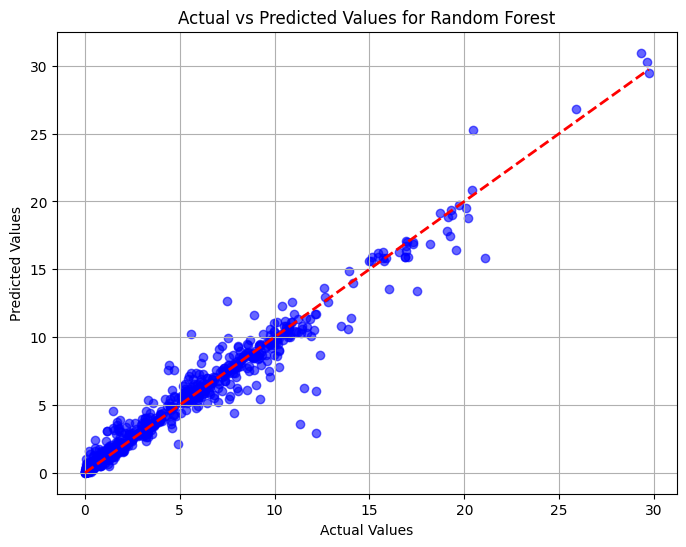

In [171]:
# Scatter plot of Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(valid_y, DTRF_predictions_tr, color='blue', alpha=0.6)
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'r--', lw=2)  # Diagonal line

# Add labels and title
plt.title('Actual vs Predicted Values for Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show plot
plt.grid(True)
plt.show()


In [140]:
## Random Forest performs the best

In [186]:
## Variable importance on random Forest

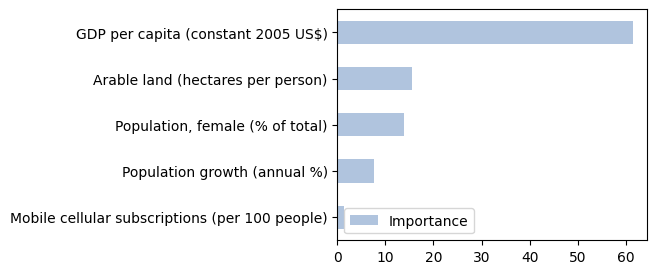

In [173]:
Importance = pd.DataFrame({'Importance':DTsalesreg_RF.feature_importances_*100}, \
                          index=['GDP per capita (constant 2005 US$)',
                     'Population, female (% of total)',
                     'Mobile cellular subscriptions (per 100 people)',
                     'Population growth (annual %)',
                     'Arable land (hectares per person)'])
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='lightsteelblue', ) # kind='barh' : Horizontal bar
plt.gcf().set_size_inches(4, 3)

In [174]:
## Partial Dependency Plots

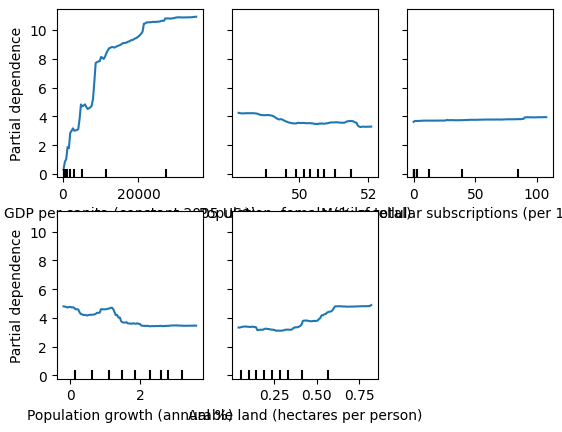

In [175]:
from sklearn.inspection import PartialDependenceDisplay
features = [0,1,2,3,4]
PartialDependenceDisplay.from_estimator(DTsalesreg_RF, train_x, features)

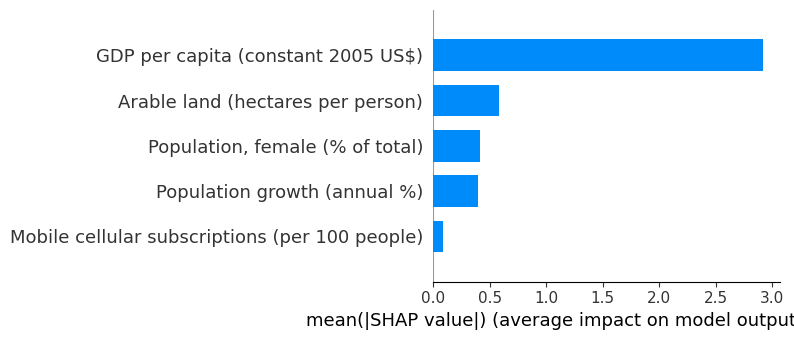

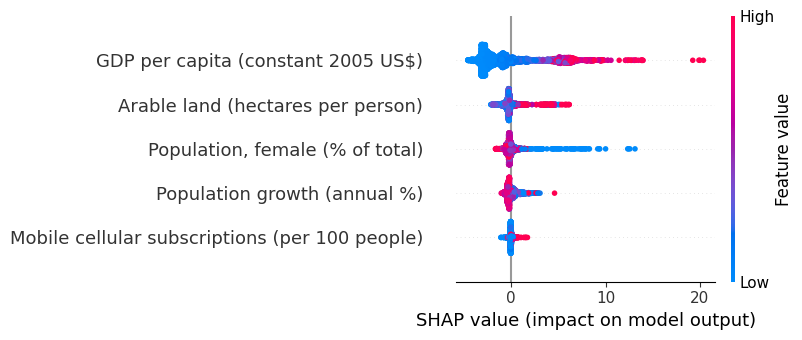

In [176]:
explainer = shap.TreeExplainer(DTsalesreg_RF)
shap_values=explainer.shap_values(x_aligned)
expected_value = explainer.expected_value

shap.summary_plot(shap_values, x_aligned, plot_type="bar")

shap.summary_plot(shap_values, x_aligned, max_display=30)

In [177]:
# Find row number for USA and India for years 1970,1995,2011
world_data_pivot_after_na_removal_outlier_train[(world_data_pivot_after_na_removal_outlier_train['CountryCode'] == 'USA')
                                                & (world_data_pivot_after_na_removal_outlier_train['Year']==1970)]

world_data_pivot_after_na_removal_outlier_train[(world_data_pivot_after_na_removal_outlier_train['CountryCode'] == 'USA')
                                                & (world_data_pivot_after_na_removal_outlier_train['Year']==1995)]

world_data_pivot_after_na_removal_outlier_train[(world_data_pivot_after_na_removal_outlier_train['CountryCode'] == 'USA')
                                                & (world_data_pivot_after_na_removal_outlier_train['Year']==2010)]

world_data_pivot_after_na_removal_outlier_train[(world_data_pivot_after_na_removal_outlier_train['CountryCode'] == 'IND')
                                                & (world_data_pivot_after_na_removal_outlier_train['Year']==1970)]

world_data_pivot_after_na_removal_outlier_train[(world_data_pivot_after_na_removal_outlier_train['CountryCode'] == 'IND')
                                                & (world_data_pivot_after_na_removal_outlier_train['Year']==1995)]

world_data_pivot_after_na_removal_outlier_train[(world_data_pivot_after_na_removal_outlier_train['CountryCode'] == 'IND')
                                                & (world_data_pivot_after_na_removal_outlier_train['Year']==2010)]

IndicatorName,CountryCode,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)",Agricultural land (% of land area),Agricultural land (sq. km),Arable land (% of land area),Arable land (hectares per person),...,"Population, total",Rural population,Rural population (% of total population),Rural population growth (annual %),Surface area (sq. km),"Survival to age 65, female (% of cohort)","Survival to age 65, male (% of cohort)",Urban population,Urban population (% of total),Urban population growth (annual %)
5593,IND,2010,36.099,56.268532,7.990475,48.278057,60.397418,1795730.0,52.808263,0.127548,...,1.230985e+09,850240997.0,69.07,0.878982,3287260.0,71.15415,64.19002,380743507.0,30.93,2.489501


In [178]:
# Code to find index for data for USA and India from above row numbers
usa_index_1970 = x_aligned.index.get_loc(13001)
usa_index_1995 = x_aligned.index.get_loc(13026)
usa_index_2010 = x_aligned.index.get_loc(13041)

india_index_1970 = x_aligned.index.get_loc(5553)
india_index_1995 = x_aligned.index.get_loc(5578)
india_index_2010 = x_aligned.index.get_loc(5593)

In [179]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[usa_index_1970,:], x_aligned.iloc[usa_index_1970,:])

In [180]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[usa_index_1995,:], x_aligned.iloc[usa_index_1995,:])

In [181]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[usa_index_2010,:], x_aligned.iloc[usa_index_2010,:])

In [182]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[india_index_1970,:], x_aligned.iloc[india_index_1970,:])

In [183]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[india_index_1995,:], x_aligned.iloc[india_index_1995,:])

In [184]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[india_index_2010,:], x_aligned.iloc[india_index_2010,:])

In [185]:
## Code ends here